In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('./Dataset/BanksDataset/AXISBANK.csv')

#print the head
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [2]:
df= df.drop(['Deliverable Volume', '%Deliverble'], axis=1)

In [3]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,2020-06-24,AXISBANK,EQ,443.65,448.0,448.50,422.20,425.4,424.65,435.17,33577340,1.461173e+15,304342.0
5093,2020-06-25,AXISBANK,EQ,424.65,419.0,428.70,410.35,418.9,421.70,420.13,49854504,2.094542e+15,356209.0
5094,2020-06-26,AXISBANK,EQ,421.70,426.0,428.75,418.00,426.0,424.85,422.80,32611425,1.378815e+15,233244.0
5095,2020-06-29,AXISBANK,EQ,424.85,415.0,415.80,402.35,404.9,404.80,406.79,36320111,1.477448e+15,333423.0


In [4]:
df1 = df.reset_index()['Close']

In [5]:
df1.shape

(5097,)

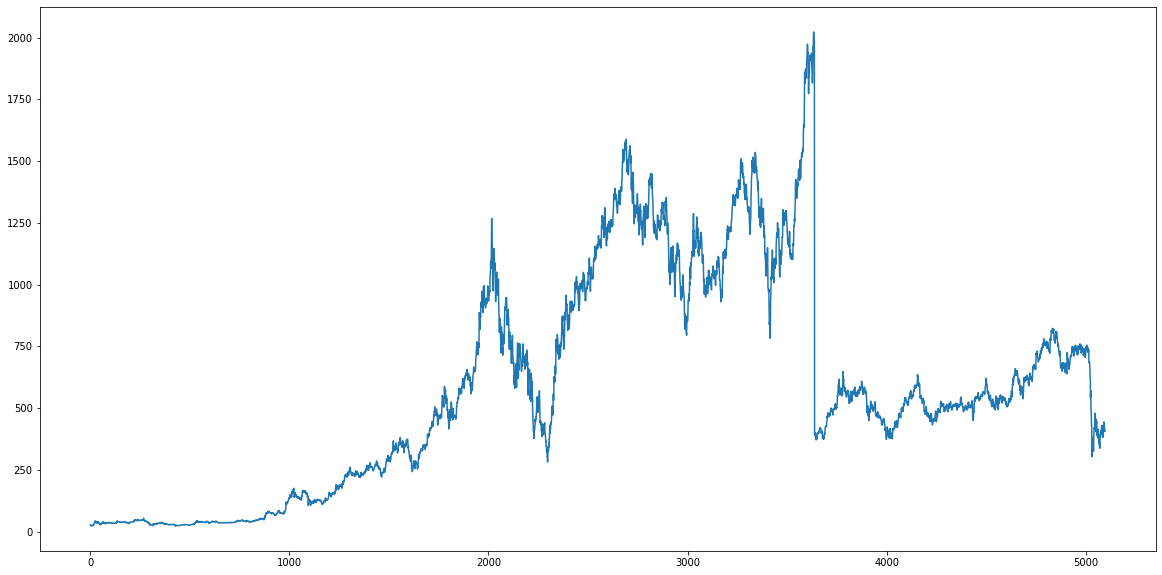

In [6]:
# Plotting the dataframe
plt.plot(df1)

In [7]:
df1= scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [8]:
df1

array([[0.00227364],
       [0.00234859],
       [0.00207376],
       ...,
       [0.20122926],
       [0.19121027],
       [0.19213472]])

In [9]:
df1.shape

(5097, 1)

In [10]:
# SPLITTING INTO TRAIN AND TEST
#deciding the split size
trainSize = int(len(df1)*0.65)
testSize= int(len(df1))- trainSize

#Making the splits
trainData, testData = df1[0:trainSize, :],df1[0:testSize, :] 

In [11]:
len(trainData), len(testData)


(3313, 1784)

In [12]:
# Converting the array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY= [],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step= 320
X_train, Y_train= create_dataset(trainData, time_step)
X_test, Y_test= create_dataset(testData, time_step)

In [14]:
print(X_train.shape)

(2992, 320)


In [15]:
print(Y_train.shape)

(2992,)


In [16]:
#Before going into LSTM, we have to make our data 3D
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1],1)


In [17]:
#Creating the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\330s\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\330s\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\330s\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\330s\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [18]:
model = Sequential()
model.add(LSTM(70, return_sequences= True, input_shape=(320,1)))
model.add(LSTM(70, return_sequences= True))
model.add(LSTM(70))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer= 'adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 320, 70)           20160     
_________________________________________________________________
lstm_1 (LSTM)                (None, 320, 70)           39480     
_________________________________________________________________
lstm_2 (LSTM)                (None, 70)                39480     
_________________________________________________________________
dense (Dense)                (None, 1)                 71        
Total params: 99,191
Trainable params: 99,191
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs= 140, batch_size=75, verbose=1)

Train on 2992 samples, validate on 1463 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/140
2992/2992 [==============================] - 86s 29ms/sample - loss: 0.0161 - val_loss: 2.2978e-04
Epoch 2/140
2992/2992 [==============================] - 94s 32ms/sample - loss: 7.1258e-04 - val_loss: 6.1116e-05
Epoch 3/140
2992/2992 [==============================] - 102s 34ms/sample - loss: 5.8468e-04 - val_loss: 5.5726e-05
Epoch 4/140
2992/2992 [==============================] - 98s 33ms/sample - loss: 5.6496e-04 - val_loss: 4.8504e-05
Epoch 5/140
2992/2992 [==============================] - 99s 33ms/sample - loss: 5.4036e-04 - val_loss: 4.4477e-05
Epoch 6/140
2992/2992 [==============================] - 101s 34ms/sample - loss: 5.3152e-04 - val_loss: 4.3617e-05
Epoch 7/140
2992/2992 [==============================] - 101s 34ms/sample - loss: 5.0555e-04 - val_loss: 4.1617e-05
Epoch 8/140
2992/2992 [==============================]

Epoch 68/140
2992/2992 [==============================] - 106s 35ms/sample - loss: 1.1251e-04 - val_loss: 1.2423e-05
Epoch 69/140
2992/2992 [==============================] - 104s 35ms/sample - loss: 1.1191e-04 - val_loss: 1.2430e-05
Epoch 70/140
2992/2992 [==============================] - 107s 36ms/sample - loss: 1.0886e-04 - val_loss: 2.4918e-05
Epoch 71/140
2992/2992 [==============================] - 109s 37ms/sample - loss: 1.1046e-04 - val_loss: 1.1921e-05
Epoch 72/140
2992/2992 [==============================] - 107s 36ms/sample - loss: 1.0901e-04 - val_loss: 1.7666e-05
Epoch 73/140
2992/2992 [==============================] - 102s 34ms/sample - loss: 1.0901e-04 - val_loss: 1.2536e-05
Epoch 74/140
2992/2992 [==============================] - 103s 34ms/sample - loss: 1.0408e-04 - val_loss: 3.1264e-05
Epoch 75/140
2992/2992 [==============================] - 102s 34ms/sample - loss: 1.3434e-04 - val_loss: 1.2076e-05
Epoch 76/140
2992/2992 [==============================] - 102s 3

In [21]:
import tensorflow as tf

In [22]:
#Doing the predictions
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

In [23]:
# transforming back to original , to perform RMSE
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [24]:
# Calculating RMSE Performance
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))


748.2619659943832

In [25]:
math.sqrt(mean_squared_error(Y_test, test_predict))

208.0956261504396

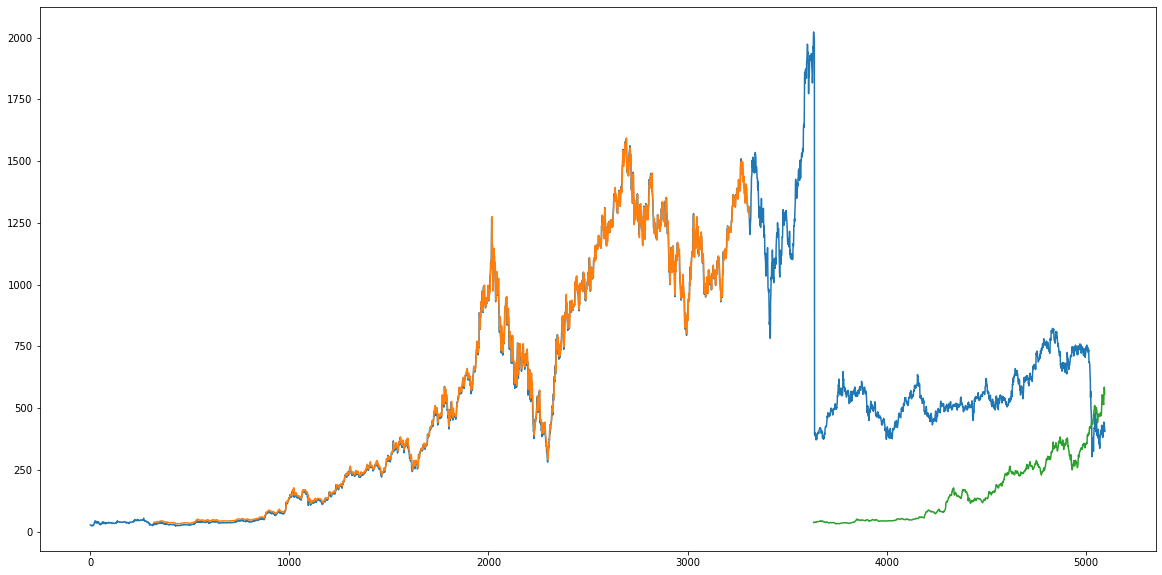

In [48]:
#Plotting the training and testing data
look_back= 320 #time stamp
#Training data
trainPredictPlot= np.empty_like(df1)
trainPredictPlot[:, :]= np.nan
trainPredictPlot[look_back: len(train_predict)+look_back, :]= train_predict

#Test Data
testPredictPlot= np.empty_like(df1)
testPredictPlot[:, :]= np.nan
testPredictPlot[len(train_predict)+(look_back*2) +1: len(df1) -1 , :]= test_predict

#Plotting the baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [73]:
len(testData)

1784

In [75]:
#Now we have to predict the next 30 days
x_input=testData[1464:].reshape(1,-1)
x_input.shape

(1, 320)

In [76]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [78]:
print(len(temp_input))

320


In [80]:
from numpy import array

lst_output=[]
n_steps=320
i=0
while(i<15):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


0 day input [0.10848491 0.10751049 0.108335   0.10743554 0.10813512 0.10838497
 0.10796022 0.10900959 0.1115081  0.11448131 0.1165051  0.11390666
 0.11128323 0.10888467 0.11318209 0.11180792 0.11762942 0.11677993
 0.11892864 0.12180192 0.12447531 0.1286728  0.13027184 0.13584349
 0.13386968 0.1346692  0.1346692  0.13187088 0.13079652 0.13304517
 0.14301419 0.13259544 0.13179592 0.13701779 0.13421947 0.13491905
 0.13761743 0.13886668 0.13234559 0.13964122 0.13724265 0.12972217
 0.13232061 0.1329952  0.13364481 0.13709274 0.14069059 0.14576254
 0.14863582 0.14521287 0.14548771 0.14793624 0.15043474 0.15088447
 0.14918549 0.15270837 0.15820508 0.17244653 0.15710574 0.15123426
 0.15545673 0.15553168 0.15735559 0.15690586 0.15818009 0.15325805
 0.15613132 0.16305217 0.15668099 0.16025385 0.16235259 0.1681741
 0.16470118 0.16095343 0.15925445 0.15520688 0.15608135 0.15418249
 0.14778633 0.14958525 0.15468219 0.15260843 0.15803018 0.16137817
 0.16889866 0.16954827 0.16392664 0.1686738  0.1657

ValueError: cannot reshape array of size 319 into shape (1,320,1)